# SUPERVISED - REGRESSION

## Project - Yes bank stock closing price prediction

### Project Summary
Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.

## Problem Statement
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


### Load data

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Description of Data

In [6]:
len(df)

185

In [7]:
df.shape

(185, 5)

In [8]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
df['Date'] =pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [11]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


# EDA
## Univariate Analysis

In [12]:
col = list(df.columns)

In [13]:
df[col]

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


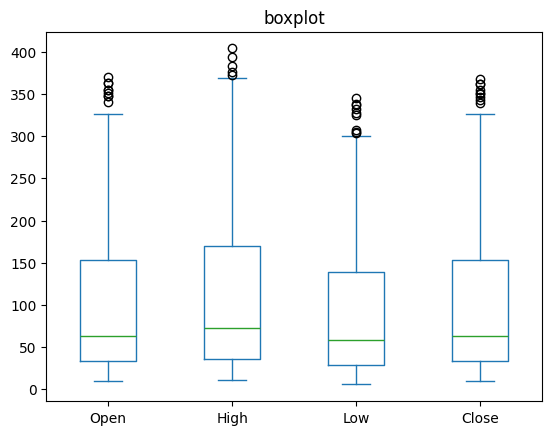

In [14]:
ax = df[col].plot(kind ='box', title = 'boxplot')

plt.show()

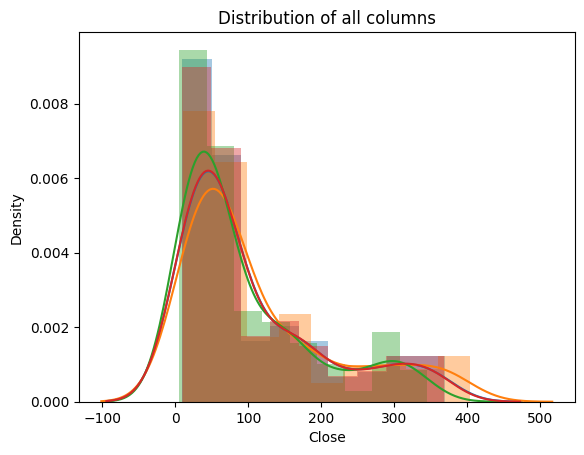

In [17]:
sns.distplot(df['Open'], kde=True)
sns.distplot(df['High'], kde = True)
sns.distplot(df['Low'], kde = True)
sns.distplot(df['Close'], kde = True)
plt.title("Distribution of all columns")
plt.show()

### Bivariate Analysis

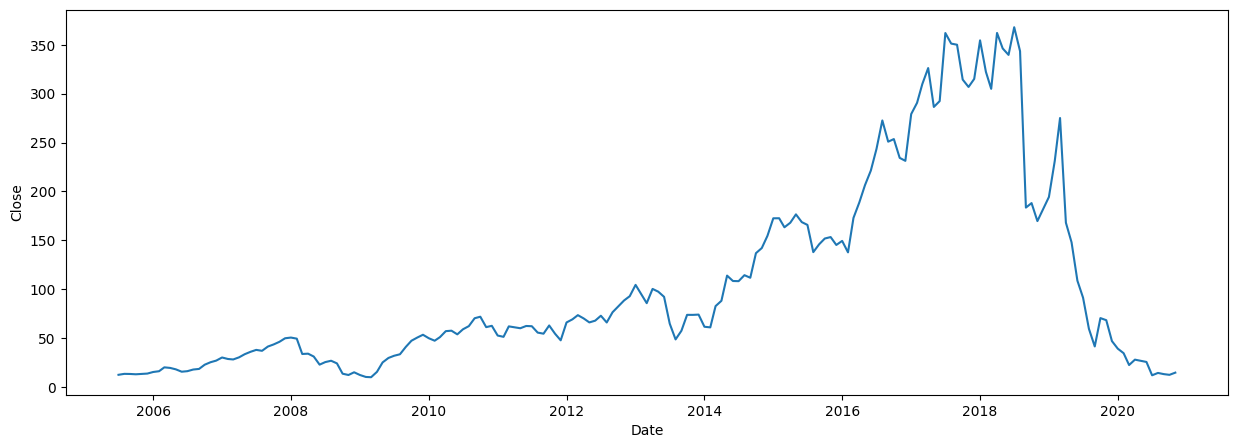

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

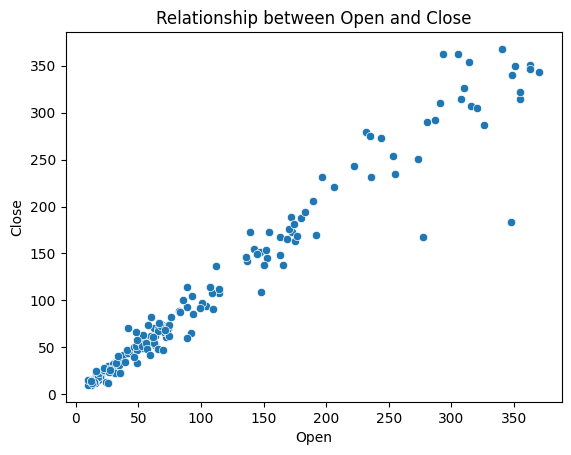

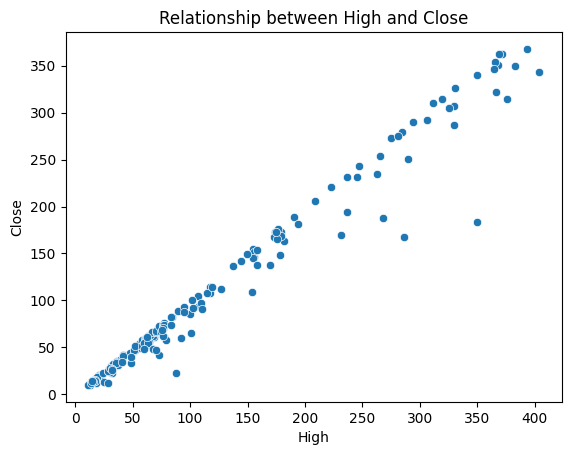

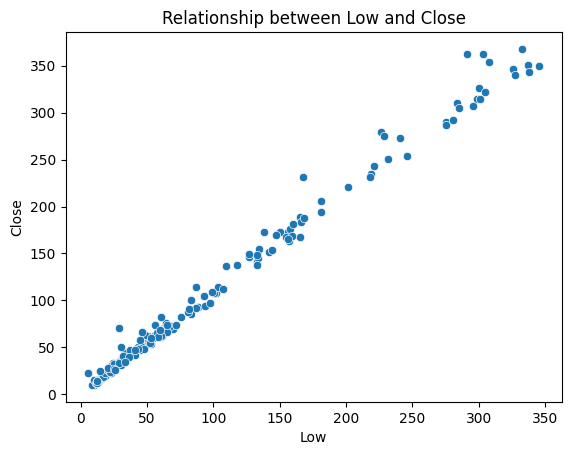

In [19]:
for i in df.columns[1:-1]:
  plt.title(f'Relationship between {i} and Close')
  sns.scatterplot(x=i,y='Close',data=df)
  plt.show()

In [20]:

df.set_index('Date',inplace=True)

In [21]:

!pip install mplfinance #This library is specifically designed for creating financial plots.

import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']]
#This line creates a new DataFrame called df_candle. It selects only the 'Open', 'High', 'Low', and 'Close' columns from your original DataFrame df.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00


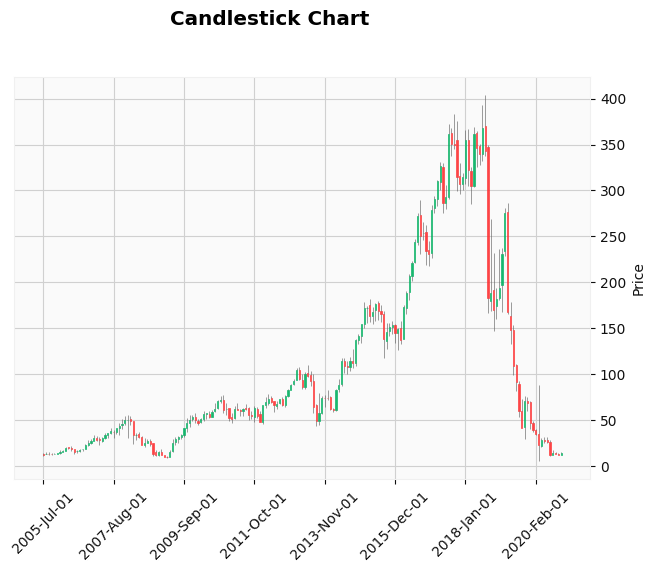

In [22]:


mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

#Multivariate Analysis

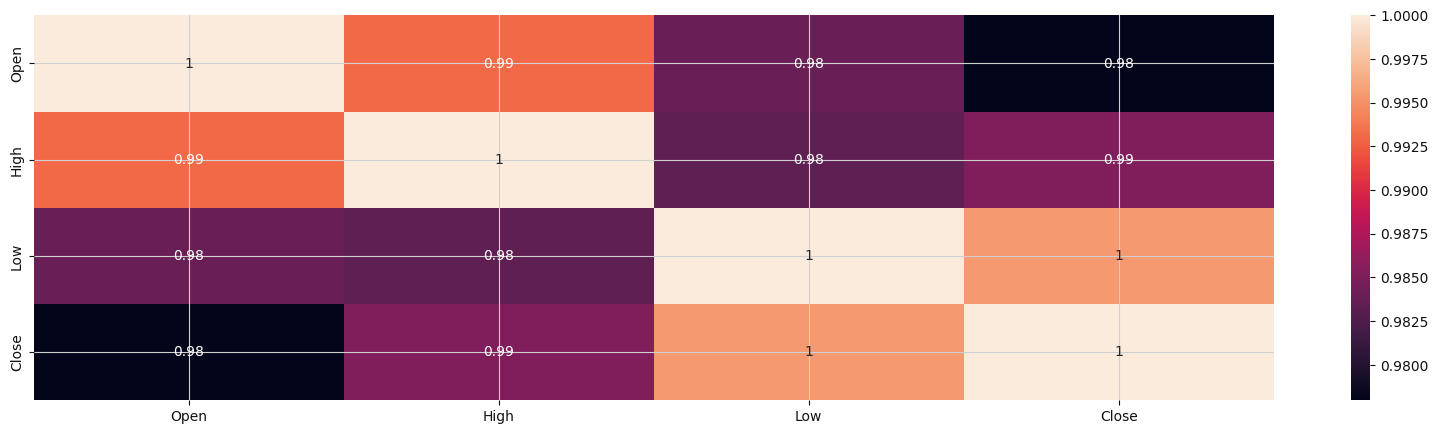

In [23]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

In [24]:
pw = PowerTransformer(method='box-cox',standardize=True)

In [25]:


cf= df[list(df.columns)]

In [26]:
df['Close']

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41
...,...
2020-07-01,11.95
2020-08-01,14.37
2020-09-01,13.15


In [27]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [28]:
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [29]:

kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

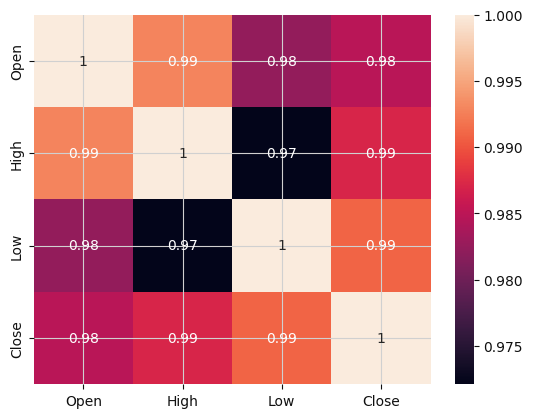

In [30]:
sns.heatmap(kf.corr(),annot=True)

In [31]:

col = list(kf.columns)

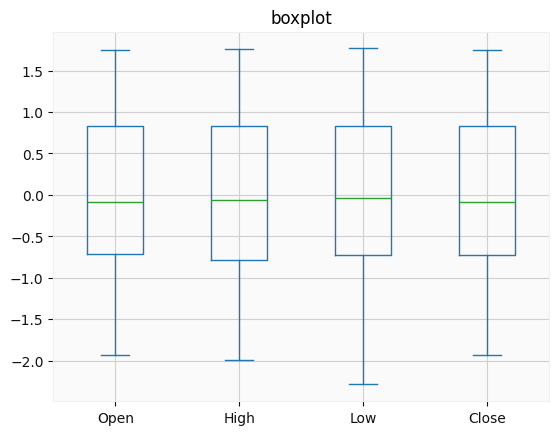

In [32]:
ax = kf[col].plot(kind='box', title='boxplot')

plt.show()

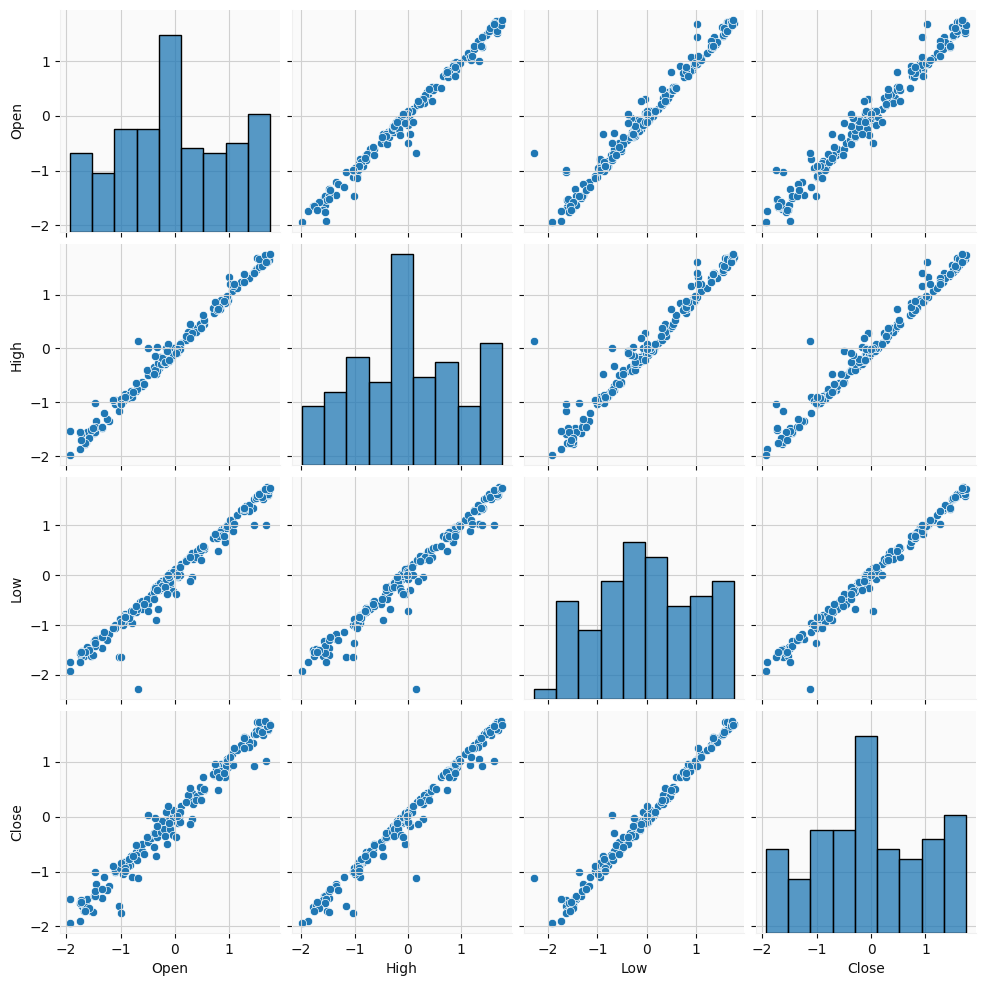

In [33]:
sns.pairplot(kf)

# Data Preprocessing

In [34]:
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [36]:
dependent_variable = 'Close'
independent_variable = [col for col in kf.columns if col != dependent_variable]

In [37]:

x=df[independent_variable].values

In [38]:
y=df[dependent_variable].values

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#Linear Regression

In [40]:

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred = reg.predict(x_test)

In [42]:
linear_r2 = r2_score(y_pred,y_test)

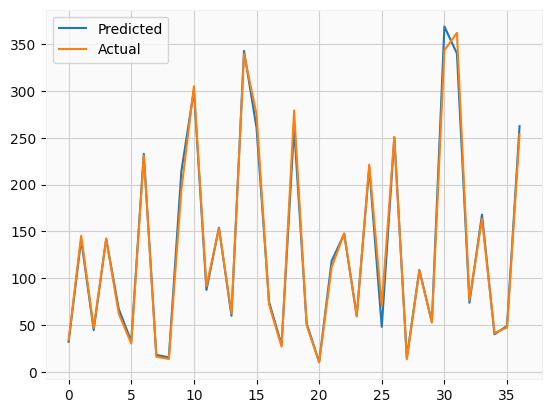

In [43]:

plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()


#KNN

In [44]:
knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)

In [45]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [46]:

model.best_params_


{'n_neighbors': 2}

In [47]:

knn = KNeighborsRegressor(n_neighbors=2)

In [48]:

knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [81]:
knn_pred = knn.predict(x_test)
r2_knn = r2_score(knn_pred,y_test)

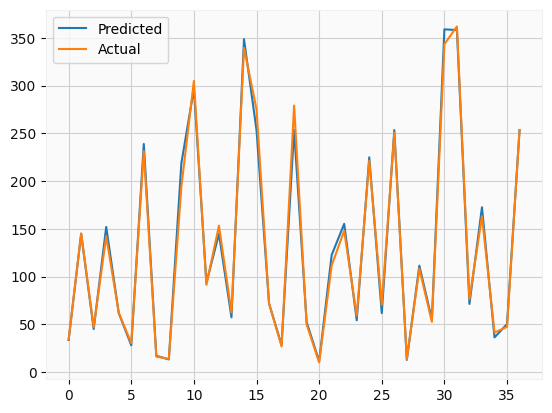

In [50]:
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#RandomForest

In [51]:
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)


In [52]:

rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [53]:
rf_model.best_params_

{'criterion': 'squared_error', 'max_features': None, 'n_estimators': 100}

In [54]:
rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)

In [55]:

rf.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=300)

In [56]:
rf_predict_ = rf.predict(x_test)

In [57]:
rf_r2 = r2_score(y_test,rf_predict_)

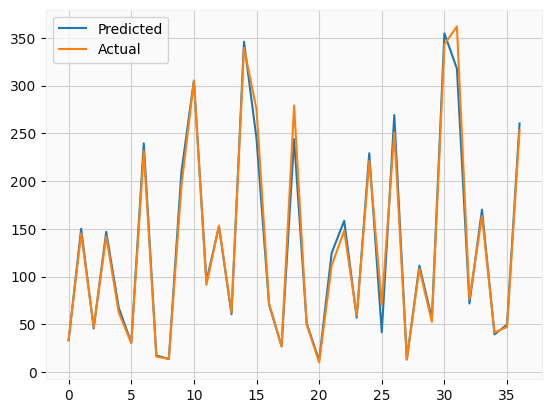

In [58]:
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Ridge Regression

In [59]:

ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_

{'alpha': 100}

In [60]:

ridge =Ridge(alpha= 100)

In [61]:
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [62]:


y_pred_ridge = ridge.predict(x_test)

In [63]:
ridge_r2 = r2_score(y_test,y_pred_ridge)

In [64]:

ridge_r2

0.9930447012730752

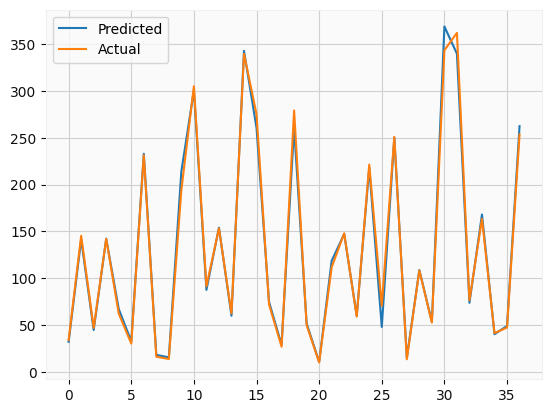

In [65]:
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Lasso

In [66]:
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [67]:
lasso_regressor.best_params_

{'alpha': 2.5}

In [68]:

lasso =Lasso(alpha= 1.6)


In [69]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.6)

In [70]:
lasso_predict = lasso.predict(x_test)

In [71]:
lasso_r2 = r2_score(lasso_predict,y_test)

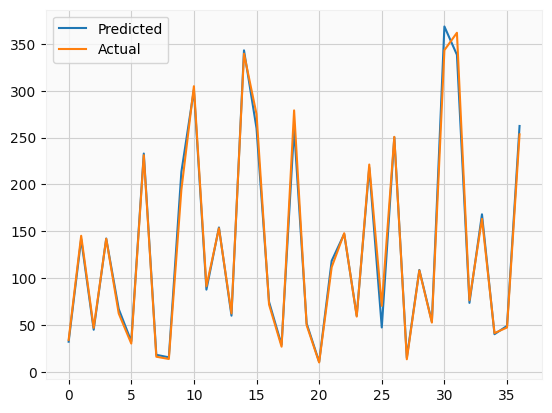

In [72]:

plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

#Elasticnet

In [73]:

elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [74]:

elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [75]:
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)

In [76]:

elastic.fit(x_train,y_train)

ElasticNet(alpha=5, l1_ratio=0.1)

In [77]:

elastic_predict = elastic.predict(x_test)

In [78]:
elastic_r2 = r2_score(elastic_predict,y_test)

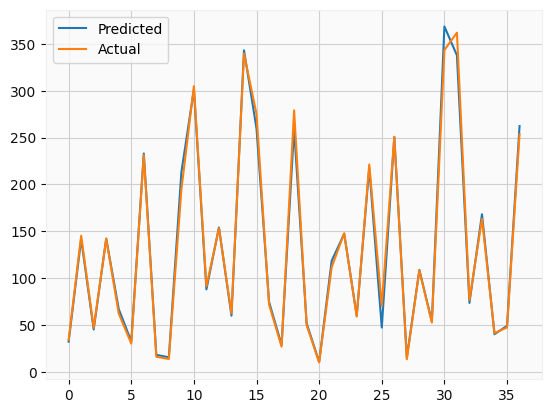

In [79]:

plt.plot(elastic_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()


#Evaluation Summary

In [82]:
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})


In [83]:

Report.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [84]:

Report

,model,r2_score
4,knn regression,0.993175
0,linear regression,0.993056
1,ridge regression,0.993045
2,lasso regression,0.992793
3,elastic net regression,0.992705
5,RandomForest Regression,0.984762


## Conclusion

- In this project, we aimed to predict the closing price of Yes Bank stock using various regression models. After loading and exploring the data, we performed univariate and bivariate analysis and addressed multicollinearity using the PowerTransformer.

- We then trained and evaluated several models, including Linear Regression, K-Nearest Neighbors (KNN), Random Forest, Ridge, Lasso, and Elastic Net Regression. The performance of each model was assessed using the R2 score.

- Based on the R2 scores, all the models performed exceptionally well, with R2 scores very close to 1, indicating that they were able to explain a very high percentage of the variance in the closing price.

- The model with the highest R2 score was KNN Regression, followed closely by Linear Regression and Ridge Regression. Lasso and Elastic Net also showed strong performance. The Random Forest Regression had a slightly lower R2 score compared to the linear models and KNN.

- Given the high R2 scores across the board, it suggests that the selected features (Open, High, and Low prices) are strong predictors of the Close price. The slight differences in R2 scores between the models might be attributed to how each algorithm handles the relationships between the features and the target variable.

- For practical application, while KNN showed the highest R2, the simplicity and interpretability of Linear Regression or Ridge Regression might be preferred depending on the specific requirements and the need for understanding the feature importance.

Overall, the project successfully demonstrates that these regression techniques can effectively predict the closing price of Yes Bank stock based on the provided historical data. Further work could involve time series specific models, incorporating external factors, or more advanced feature engineering to potentially improve predictions.